# Analyse de données Budget et Finances

## Paramétrage

In [ ]:
import os

import pandas as pd
CHEMIN_DOSSIER_DONNÉES = '../../../../données/DIAMANT'
DATE_FICHIER = '2022_09_01'
encoding = 'utf-8'


In [ ]:
ann_errd_ej_et = pd.read_csv(
    os.path.join(CHEMIN_DOSSIER_DONNÉES, 'ANN_ERRD_EJ_ET_' + DATE_FICHIER + '.CSV'),
    delimiter=";",
    encoding=encoding,
    usecols=['Finess EJ',
             'Finess',
             'Année',
             'Dépenses Groupe I ERRD',
             'Dépenses Groupe II ERRD',
             'Dépenses Groupe III ERRD',
             'Recettes Groupe I ERRD',
             'Recettes Groupe II ERRD',
             'Recettes Groupe III ERRD',
             'MS Résultat net comptable ERRD',
             '655 Quotes-parts de résultat sur opérations faites en commun'],
)

In [ ]:
ann_ca_ej_et = pd.read_csv(
    os.path.join(CHEMIN_DOSSIER_DONNÉES, 'ANN_CA_EJ_ET_' + DATE_FICHIER + '.CSV'),
    delimiter=";",
    encoding=encoding,
    usecols=['Finess EJ',
             'Finess',
             'Année',
             'Recettes Groupe I CA',
             'Recettes Groupe II CA',
             'Recettes Groupe III CA',
             'Dépenses Groupe I CA',
             'Dépenses Groupe II CA',
             'Dépenses Groupe III CA',
             'Charges CA PA',
             'Produits CA PA',
             'Taux de CAF CA PH',
             'Taux vétusté Construction CA',
             'MS Résultat net comptable CA PH',
             'MS Résultat net comptable CA PA'],
)

In [224]:
ann_errd_ej = pd.read_csv(
    os.path.join(CHEMIN_DOSSIER_DONNÉES, 'ANN_ERRD_EJ_' + DATE_FICHIER + '.CSV'),
    delimiter=";",
    encoding=encoding,
    usecols=['Finess EJ',
            'Année',
            'Taux vétusté Construction ERRD',
             'Taux de CAF ERRD'],
)


## Doublons

### On s'attend à avoir une seule valeur par (Finess, Année)

In [ ]:
a_plus_d_une_donnée_par_finess_par_année = (ann_errd_ej_et.groupby(['Finess', 'Année']).nunique() > 1).any(axis=1)

## Valeurs manquantes


In [ ]:
ann_errd_ej_et.isna().sum() / ann_errd_ej_et.shape[0]


### Années renseignées

In [ ]:
ann_errd_ej_et.groupby('Finess').count()['Année'].hist()


In [ ]:
ann_errd_ej_et['Année'].nunique()

In [ ]:
ann_errd_ej_et['Année'].hist()

In [ ]:
ann_errd_ej_et['Année'].max()

### Valeurs manquantes par colonne

In [ ]:
nombre_d_établissements_dans_ann_ms_tdp_et = ann_errd_ej_et['Finess'].nunique()

#### % de valeurs manquantes par colonne

In [ ]:
est_une_valeur_manquante = ann_errd_ej_et.drop('Finess EJ', axis=1).set_index(['Finess', 'Année']).isna().reset_index()
établissement_avec_au_moins_une_valeur_renseignée = (~est_une_valeur_manquante.groupby(
    'Finess').any().drop('Année', axis=1))
établissement_avec_au_moins_une_valeur_renseignée.sum() / nombre_d_établissements_dans_ann_ms_tdp_et

In [ ]:
ann_errd_ej_et.groupby('Finess').any().sum() / nombre_d_établissements_dans_ann_ms_tdp_et


0 équivaut à valeur manquante ? Dans quels cas ?

### Cohérence des données

#### Dépenses positives

In [ ]:
(ann_errd_ej_et['Dépenses Groupe I ERRD'] > 0).sum()

In [ ]:
(ann_errd_ej_et['Dépenses Groupe II ERRD'] > 0).sum()
ann_errd_ej_et[ann_errd_ej_et['Dépenses Groupe II ERRD'] > 0]

In [ ]:
(ann_errd_ej_et['Dépenses Groupe III ERRD'] > 0).sum()
ann_errd_ej_et[ann_errd_ej_et['Dépenses Groupe III ERRD'] > 0]


#### Recettes négatives


In [ ]:
(ann_errd_ej_et['Recettes Groupe I ERRD'] < 0).sum()

In [ ]:
(ann_errd_ej_et['Recettes Groupe II ERRD'] < 0).sum()


In [ ]:
ann_errd_ej_et[ann_errd_ej_et['Recettes Groupe II ERRD'] < 0]

In [ ]:
(ann_errd_ej_et['Recettes Groupe III ERRD'] < 0).sum()


In [ ]:
ann_errd_ej_et[ann_errd_ej_et['Recettes Groupe III ERRD'] < 0]


#### Résultat

In [ ]:
résultat = ann_errd_ej_et['Recettes Groupe I ERRD'] + ann_errd_ej_et['Recettes Groupe II ERRD'] + ann_errd_ej_et[
    'Recettes Groupe III ERRD'] + ann_errd_ej_et['Dépenses Groupe I ERRD'] + ann_errd_ej_et['Dépenses Groupe II ERRD'] + ann_errd_ej_et['Dépenses Groupe III ERRD']


In [ ]:
résultat.name = 'résultat'

In [ ]:
ann_errd_ej_et.head()

In [ ]:
a_un_résultat_différent_que_la_somme_des_dépenses_et_recettes = ~(résultat.round(decimals=2) == ann_errd_ej_et['MS Résultat net comptable ERRD'].round(decimals=2))
ann_errd_ej_et.loc[a_un_résultat_différent_que_la_somme_des_dépenses_et_recettes, ["Finess",
                                                                                  "Année",
                                                                                  "MS Résultat net comptable ERRD"]].isna().sum()


In [ ]:
a_un_résultat_différent_que_la_somme_des_dépenses_et_recettes.sum()

In [ ]:
ann_errd_ej_et.loc[a_un_résultat_différent_que_la_somme_des_dépenses_et_recettes, ["Finess",
                                                                                  "Année",
                                                                                  "MS Résultat net comptable ERRD"]]

Les fois où le résultat n'est pas consistant avec la somme des recettes et des dépenses c'est parce qu'on n'a pas de valeur renseignée

#### 655 Quotes-parts de résultat sur opérations faites en commun


C'est un indicateur qui est positif sur notre maquette

In [ ]:
ann_errd_ej_et['655 Quotes-parts de résultat sur opérations faites en commun'].hist(bins=50)


In [ ]:
ann_errd_ej_et['655 Quotes-parts de résultat sur opérations faites en commun'].max()


In [ ]:
(ann_errd_ej_et['655 Quotes-parts de résultat sur opérations faites en commun'] > 0).sum()


In [ ]:
ann_errd_ej_et[ann_errd_ej_et['655 Quotes-parts de résultat sur opérations faites en commun'] > 0]


Est-ce normal d'avoir des valeurs positives ?


### Stats descriptives


In [ ]:
ann_errd_ej_et.describe()

In [ ]:
ann_errd_ej_et[[
    'Dépenses Groupe II ERRD',
    'Dépenses Groupe III ERRD',
    'Recettes Groupe I ERRD',
    'Recettes Groupe II ERRD',
    'Recettes Groupe III ERRD',
    'MS Résultat net comptable ERRD',
    '655 Quotes-parts de résultat sur opérations faites en commun']].hist(bins=25)

## ANN_CA_EJ_ET et ANN_ERRD_EJ_ET sont-ils bien disjoints ?


In [ ]:
finess_ann_ca_ej_et = set(ann_ca_ej_et['Finess'])

In [ ]:
finess_ann_errd_ej_et = set(ann_errd_ej_et['Finess'])

In [ ]:
len(finess_ann_ca_ej_et.intersection(finess_ann_errd_ej_et))

In [ ]:
ann_ca_ej_et.merge(ann_errd_ej_et, on=['Finess', 'Année'], how='inner')


In [ ]:
ann_errd_ej_et[[
    'Finess',
    'Année',
    'Dépenses Groupe II ERRD',
    'Dépenses Groupe III ERRD',
    'Recettes Groupe I ERRD',
    'Recettes Groupe II ERRD',
    'Recettes Groupe III ERRD',
    'MS Résultat net comptable ERRD']].merge(
    ann_ca_ej_et[
        [
            'Finess',
            'Année',
            'Dépenses Groupe II CA',
            'Dépenses Groupe III CA',
            'Recettes Groupe I CA',
            'Recettes Groupe II CA',
            'Recettes Groupe III CA',
            'MS Résultat net comptable CA PA',
            'MS Résultat net comptable CA PH']
    ],
    on=['Finess', 'Année'],
    how='inner'
)

Que fait-on pour les établissements que l'on retrouve à la fois dans la catégorie CA et ERRD ?

## ANN_CA_EJ_ET

### On s'attend à avoir une seule valeur par (Finess, Année)

In [147]:
a_plus_d_une_donnée_par_finess_par_année = (ann_ca_ej_et.groupby(['Finess', 'Année']).nunique() > 1).any(axis=1)

In [150]:
a_plus_d_une_donnée_par_finess_par_année.sum()

0

## Valeurs manquantes


In [151]:
ann_ca_ej_et.isna().sum() / ann_ca_ej_et.shape[0]

Finess EJ                          0.000000
Finess                             0.000000
Année                              0.000000
MS Résultat net comptable CA PH    0.039521
Taux de CAF CA PH                  0.043042
Taux vétusté Construction CA       0.787103
MS Résultat net comptable CA PA    0.960374
Charges CA PA                      0.960374
Produits CA PA                     0.960374
Recettes Groupe I CA               0.039521
Recettes Groupe II CA              0.039521
Recettes Groupe III CA             0.039521
Dépenses Groupe I CA               0.039521
Dépenses Groupe II CA              0.039521
Dépenses Groupe III CA             0.039521
dtype: float64

In [157]:
aucune_valeur_de_résultat = (ann_ca_ej_et["MS Résultat net comptable CA PA"].isna() & ann_ca_ej_et[
    "MS Résultat net comptable CA PH"].isna())
aucune_valeur_de_résultat.sum()

9

In [158]:
ann_ca_ej_et[aucune_valeur_de_résultat]

,Finess EJ,Finess,Année,MS Résultat net comptable CA PH,Taux de CAF CA PH,Taux vétusté Construction CA,MS Résultat net comptable CA PA,Charges CA PA,Produits CA PA,Recettes Groupe I CA,Recettes Groupe II CA,Recettes Groupe III CA,Dépenses Groupe I CA,Dépenses Groupe II CA,Dépenses Groupe III CA
4959,330790791,330785403,2020,NaN,NaN,0.379610,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7381,460002439,460006331,2018,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
11795,680012689,680012739,2018,NaN,NaN,0.374871,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
13012,730013307,730783859,2018,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
13046,730784485,730783818,2018,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
13977,750712341,750018749,2018,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
13985,750712341,750047664,2018,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
15206,750825846,910015189,2018,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
16521,830210613,830201166,2018,NaN,NaN,0.423614,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Années renseignées

<AxesSubplot:>

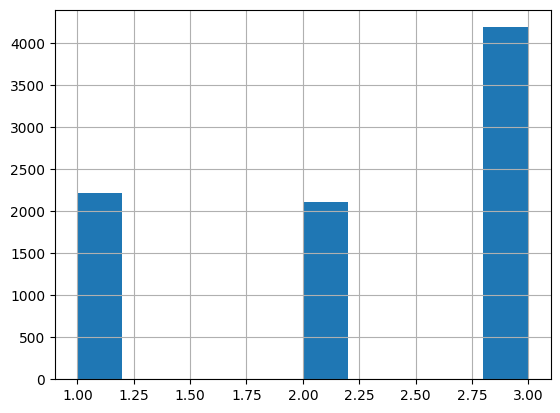

In [159]:
ann_ca_ej_et.groupby('Finess').count()['Année'].hist()


In [160]:
ann_ca_ej_et['Année'].nunique()

3

<AxesSubplot:>

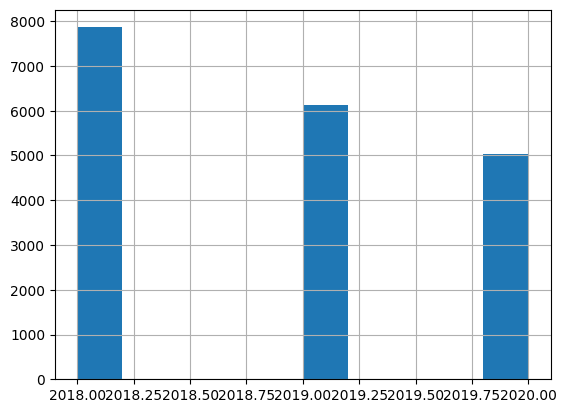

In [161]:
ann_ca_ej_et['Année'].hist()

In [162]:
ann_ca_ej_et['Année'].max()

2020

Dans l'autre fichier, on observait la tendance inverse : plus d'années récentes, moins d'années passées

### Valeurs manquantes par colonne

In [163]:
nombre_d_établissements_dans_ann_ms_tdp_et = ann_ca_ej_et['Finess'].nunique()

#### % de valeurs manquantes par colonne

In [164]:
est_une_valeur_manquante = ann_ca_ej_et.drop('Finess EJ', axis=1).set_index(['Finess', 'Année']).isna().reset_index()
établissement_avec_au_moins_une_valeur_renseignée = (~est_une_valeur_manquante.groupby(
    'Finess').any().drop('Année', axis=1))
établissement_avec_au_moins_une_valeur_renseignée.sum() / nombre_d_établissements_dans_ann_ms_tdp_et

MS Résultat net comptable CA PH    0.957444
Taux de CAF CA PH                  0.950293
Taux vétusté Construction CA       0.060610
MS Résultat net comptable CA PA    0.041852
Charges CA PA                      0.041852
Produits CA PA                     0.041852
Recettes Groupe I CA               0.957444
Recettes Groupe II CA              0.957444
Recettes Groupe III CA             0.957444
Dépenses Groupe I CA               0.957444
Dépenses Groupe II CA              0.957444
Dépenses Groupe III CA             0.957444
dtype: float64

On a beaucoup plus d'établissements pour lesquels le résultat est calculé en mode PA que PH

In [165]:
ann_ca_ej_et.groupby('Finess').any().sum() / nombre_d_établissements_dans_ann_ms_tdp_et


Finess EJ                          1.000000
Année                              1.000000
MS Résultat net comptable CA PH    0.955803
Taux de CAF CA PH                  0.955451
Taux vétusté Construction CA       0.366237
MS Résultat net comptable CA PA    0.041970
Charges CA PA                      0.042204
Produits CA PA                     0.042087
Recettes Groupe I CA               0.949941
Recettes Groupe II CA              0.899179
Recettes Groupe III CA             0.880070
Dépenses Groupe I CA               0.954513
Dépenses Groupe II CA              0.956506
Dépenses Groupe III CA             0.952872
dtype: float64

0 équivaut à valeur manquante ? Dans quels cas ?

Que faire lorsque les recettes sont calculées en mode "Charges / Produits" ? On n'a pas la maquette

### Cohérence des données

#### Dépenses positives

In [170]:
(ann_ca_ej_et['Dépenses Groupe I CA'] > 0).sum()
ann_ca_ej_et[ann_ca_ej_et['Dépenses Groupe I CA'] > 0]

,Finess EJ,Finess,Année,MS Résultat net comptable CA PH,Taux de CAF CA PH,Taux vétusté Construction CA,MS Résultat net comptable CA PA,Charges CA PA,Produits CA PA,Recettes Groupe I CA,Recettes Groupe II CA,Recettes Groupe III CA,Dépenses Groupe I CA,Dépenses Groupe II CA,Dépenses Groupe III CA
6498,410005722,410005946,2020,39435.69,0.335129,NaN,NaN,NaN,NaN,209205.86,16235.76,11810.18,10200.53,-154036.15,-53980.49
16489,830210092,830016986,2018,3636436.43,0.993378,NaN,NaN,NaN,NaN,3266502.98,280451.45,119600.87,13424.99,-4908.98,-38634.88


In [169]:
(ann_ca_ej_et['Dépenses Groupe II CA'] > 0).sum()

0

In [168]:
(ann_ca_ej_et['Dépenses Groupe III CA'] > 0).sum()
ann_ca_ej_et[ann_ca_ej_et['Dépenses Groupe III CA'] > 0]

,Finess EJ,Finess,Année,MS Résultat net comptable CA PH,Taux de CAF CA PH,Taux vétusté Construction CA,MS Résultat net comptable CA PA,Charges CA PA,Produits CA PA,Recettes Groupe I CA,Recettes Groupe II CA,Recettes Groupe III CA,Dépenses Groupe I CA,Dépenses Groupe II CA,Dépenses Groupe III CA
3456,260013321,260010038,2018,94070.69,0.210780,NaN,NaN,NaN,NaN,545751.49,7707.67,-28051.76,-110791.16,-375621.43,55075.88
4447,310788104,310020334,2018,31783.74,0.033289,0.261784,NaN,NaN,NaN,929793.84,770.87,0.00,-84935.90,-814650.85,805.78
6685,420787046,420009979,2019,32420.08,0.063308,NaN,NaN,NaN,NaN,405740.00,2497.57,0.00,-5971.63,-376222.90,6377.04
7020,440018612,440029700,2020,55772.16,0.372828,NaN,NaN,NaN,NaN,155384.61,0.00,249.00,-17299.55,-84783.47,2221.57
7021,440018612,440029700,2019,71134.61,0.478533,NaN,NaN,NaN,NaN,153384.61,0.00,18843.00,-24034.21,-77210.40,151.61
7078,440031169,440045268,2019,-3529.81,-0.027780,NaN,NaN,NaN,NaN,212099.57,0.00,0.00,-44278.07,-173713.64,2362.33
12230,690793435,750047631,2018,29663.86,0.026873,NaN,NaN,NaN,NaN,1103854.06,0.00,0.00,-26272.82,-1048141.02,223.64
18600,940810328,940019219,2018,56587.00,0.167949,NaN,NaN,NaN,NaN,358205.00,256.00,10240.00,-24023.00,-292441.00,4350.00


In [182]:
(ann_ca_ej_et['Charges CA PA'] > 0).sum()
ann_ca_ej_et[ann_ca_ej_et['Charges CA PA'] > 0]

,Finess EJ,Finess,Année,MS Résultat net comptable CA PH,Taux de CAF CA PH,Taux vétusté Construction CA,MS Résultat net comptable CA PA,Charges CA PA,Produits CA PA,Recettes Groupe I CA,Recettes Groupe II CA,Recettes Groupe III CA,Dépenses Groupe I CA,Dépenses Groupe II CA,Dépenses Groupe III CA


#### Recettes négatives


In [176]:
(ann_ca_ej_et['Recettes Groupe I CA'] < 0).sum()

0

In [177]:
(ann_ca_ej_et['Recettes Groupe II CA'] < 0).sum()


96

In [178]:
ann_ca_ej_et[ann_ca_ej_et['Recettes Groupe II CA'] < 0]

,Finess EJ,Finess,Année,MS Résultat net comptable CA PH,Taux de CAF CA PH,Taux vétusté Construction CA,MS Résultat net comptable CA PA,Charges CA PA,Produits CA PA,Recettes Groupe I CA,Recettes Groupe II CA,Recettes Groupe III CA,Dépenses Groupe I CA,Dépenses Groupe II CA,Dépenses Groupe III CA
117,020005211,020003679,2019,220848.41,0.271077,NaN,NaN,NaN,NaN,1672052.06,-38.01,137168.59,-186783.07,-975351.49,-426199.67
145,020005211,020018099,2020,-33816.98,-0.160963,NaN,NaN,NaN,NaN,106460.26,-82.58,14429.10,-5200.21,-109667.80,-39755.75
498,060013448,060020948,2020,40509.36,0.059992,NaN,NaN,NaN,NaN,1171974.52,-756.43,36076.10,-74644.75,-980082.80,-112057.28
499,060013448,060020948,2019,-72358.27,-0.033092,NaN,NaN,NaN,NaN,1085999.97,-4228.41,78174.55,-52346.96,-1073179.50,-106777.92
514,060020443,040004087,2018,2734.23,0.041778,NaN,NaN,NaN,NaN,95290.39,-19.81,662.08,-6082.67,-78626.76,-8489.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18349,930813415,930690037,2020,158396.21,0.095180,NaN,NaN,NaN,NaN,2301823.32,-1819.08,44748.40,-315530.11,-1549508.63,-321317.69
18865,970111134,970104204,2019,29616.35,0.066867,NaN,NaN,NaN,NaN,568341.38,-734.05,12800.00,-72027.19,-411100.75,-67663.04
18908,970209284,970210233,2020,14513.07,0.026357,NaN,NaN,NaN,NaN,656135.29,-1821.66,0.00,-104065.27,-447697.66,-88037.63
18910,970209284,970210233,2018,53093.02,0.314544,NaN,NaN,NaN,NaN,882511.09,-358.64,0.00,-136174.21,-387522.33,-305362.89


In [179]:
(ann_ca_ej_et['Recettes Groupe III CA'] < 0).sum()


49

In [180]:
ann_ca_ej_et[ann_ca_ej_et['Recettes Groupe III CA'] < 0]


,Finess EJ,Finess,Année,MS Résultat net comptable CA PH,Taux de CAF CA PH,Taux vétusté Construction CA,MS Résultat net comptable CA PA,Charges CA PA,Produits CA PA,Recettes Groupe I CA,Recettes Groupe II CA,Recettes Groupe III CA,Dépenses Groupe I CA,Dépenses Groupe II CA,Dépenses Groupe III CA
999,100000835,100005727,2019,31583.03,0.192853,NaN,NaN,NaN,NaN,194974.13,4155.11,-84.48,-5881.00,-144296.86,-17283.87
1399,130007032,130809049,2020,79222.81,0.143391,NaN,NaN,NaN,NaN,614766.21,0.00,-2051.67,-50229.08,-430436.93,-52825.72
1836,130804156,130810518,2018,966.69,0.009989,NaN,NaN,NaN,NaN,405120.88,10880.62,-211.83,-65691.54,-263349.65,-85781.79
2902,220001192,220013346,2018,35027.48,0.106113,NaN,NaN,NaN,NaN,408789.55,1438.23,-36.19,-34701.05,-307767.33,-32695.73
2951,220023287,220023295,2020,49103.66,0.182354,NaN,NaN,NaN,NaN,299873.74,0.00,-5.78,-10772.82,-222744.83,-17246.65
3456,260013321,260010038,2018,94070.69,0.210780,NaN,NaN,NaN,NaN,545751.49,7707.67,-28051.76,-110791.16,-375621.43,55075.88
3929,2B0005631,2B0003388,2019,5717.73,0.044682,NaN,NaN,NaN,NaN,517344.00,729.96,-892.98,-53305.39,-275592.35,-182565.51
3930,2B0005631,2B0003388,2018,15352.02,0.057612,NaN,NaN,NaN,NaN,517344.00,466.43,-2958.29,-51183.84,-265506.44,-182809.84
3932,2B0005631,2B0005136,2019,9729.91,0.077089,NaN,NaN,NaN,NaN,126752.00,426.99,-962.68,-14973.46,-61877.47,-39635.47
3933,2B0005631,2B0005136,2018,8982.33,0.071034,NaN,NaN,NaN,NaN,126752.00,39.72,-340.56,-12459.19,-64858.23,-40151.41


In [184]:
(ann_ca_ej_et['Produits CA PA'] < 0).sum()
ann_ca_ej_et[ann_ca_ej_et['Produits CA PA'] < 0]

,Finess EJ,Finess,Année,MS Résultat net comptable CA PH,Taux de CAF CA PH,Taux vétusté Construction CA,MS Résultat net comptable CA PA,Charges CA PA,Produits CA PA,Recettes Groupe I CA,Recettes Groupe II CA,Recettes Groupe III CA,Dépenses Groupe I CA,Dépenses Groupe II CA,Dépenses Groupe III CA


#### Résultat

In [197]:
ann_ca_ej_et_avec_résultat_CA_PH_renseigné = ann_ca_ej_et.dropna(subset=['MS Résultat net comptable CA PH'])

In [198]:
résultat = ann_ca_ej_et_avec_résultat_CA_PH_renseigné['Recettes Groupe I CA'] + ann_ca_ej_et_avec_résultat_CA_PH_renseigné['Recettes Groupe II CA'] + ann_ca_ej_et_avec_résultat_CA_PH_renseigné[
    'Recettes Groupe III CA'] + ann_ca_ej_et_avec_résultat_CA_PH_renseigné['Dépenses Groupe I CA'] + ann_ca_ej_et_avec_résultat_CA_PH_renseigné['Dépenses Groupe II CA'] + ann_ca_ej_et_avec_résultat_CA_PH_renseigné['Dépenses Groupe III CA']


In [194]:
résultat.name = 'résultat'

In [199]:
a_un_résultat_différent_que_la_somme_des_dépenses_et_recettes = ~(résultat.round(decimals=2) == ann_ca_ej_et_avec_résultat_CA_PH_renseigné['MS Résultat net comptable CA PH'].round(decimals=2))
ann_ca_ej_et_avec_résultat_CA_PH_renseigné.loc[a_un_résultat_différent_que_la_somme_des_dépenses_et_recettes, ["Finess",
                                                                                  "Année",
                                                                                  "MS Résultat net comptable CA PH"]].isna().sum()


Finess                             0.0
Année                              0.0
MS Résultat net comptable CA PH    0.0
dtype: float64

In [203]:
ann_ca_ej_et_avec_résultat_CA_PA_renseigné = ann_ca_ej_et.dropna(subset=['MS Résultat net comptable CA PA'])

In [204]:
résultat = ann_ca_ej_et_avec_résultat_CA_PA_renseigné['Produits CA PA'] + ann_ca_ej_et_avec_résultat_CA_PA_renseigné['Charges CA PA']

In [205]:
a_un_résultat_différent_que_la_somme_des_dépenses_et_recettes = ~(résultat.round(decimals=2) == ann_ca_ej_et_avec_résultat_CA_PA_renseigné['MS Résultat net comptable CA PA'].round(decimals=2))
ann_ca_ej_et_avec_résultat_CA_PA_renseigné.loc[a_un_résultat_différent_que_la_somme_des_dépenses_et_recettes, ["Finess",
                                                                                                               "Année",
                                                                                                               "MS Résultat net comptable CA PA"]].isna().sum()


Finess                             0.0
Année                              0.0
MS Résultat net comptable CA PA    0.0
dtype: float64

### Taux de vétusté construction

In [213]:
a_une_vétusté_négative = ann_ca_ej_et['Taux vétusté Construction CA'] < 0
(a_une_vétusté_négative).sum()

1

In [214]:
ann_ca_ej_et[a_une_vétusté_négative]

,Finess EJ,Finess,Année,MS Résultat net comptable CA PH,Taux de CAF CA PH,Taux vétusté Construction CA,MS Résultat net comptable CA PA,Charges CA PA,Produits CA PA,Recettes Groupe I CA,Recettes Groupe II CA,Recettes Groupe III CA,Dépenses Groupe I CA,Dépenses Groupe II CA,Dépenses Groupe III CA
18720,950016402,950014241,2020,8385.34,0.023344,-121.917079,NaN,NaN,NaN,992622.88,33956.12,9662.94,-146951.28,-673150.46,-207754.86


In [215]:
a_une_vétusté_sup_à_1 = ann_ca_ej_et['Taux vétusté Construction CA'] > 1
(a_une_vétusté_sup_à_1).sum()

65

In [216]:
ann_ca_ej_et[a_une_vétusté_sup_à_1]

,Finess EJ,Finess,Année,MS Résultat net comptable CA PH,Taux de CAF CA PH,Taux vétusté Construction CA,MS Résultat net comptable CA PA,Charges CA PA,Produits CA PA,Recettes Groupe I CA,Recettes Groupe II CA,Recettes Groupe III CA,Dépenses Groupe I CA,Dépenses Groupe II CA,Dépenses Groupe III CA
330,030000665,030785844,2020,-4725219.86,-8.025350,8.370917,NaN,NaN,NaN,0.00,483995.45,56720.00,-785012.46,-3570197.02,-910725.83
392,030007801,780690038,2020,69202.13,0.197519,5.188913,NaN,NaN,NaN,3096441.10,10006.27,120756.59,-493581.61,-1882766.61,-781653.61
487,060002094,060791712,2020,119960.95,0.121229,5.918179,NaN,NaN,NaN,4803299.02,462314.65,231969.69,-537314.79,-3929557.97,-910749.65
524,060020443,060014438,2020,125459.64,0.128359,10.402527,NaN,NaN,NaN,1269958.04,1262.78,23211.05,-92103.02,-896720.91,-180148.30
1124,110786100,110002854,2018,1468.66,0.018955,1.241304,NaN,NaN,NaN,1908845.62,10212.65,15154.95,-302875.59,-1457450.12,-172418.85
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17073,870008984,870005683,2018,2272.50,0.046536,1.362541,NaN,NaN,NaN,731166.80,0.00,36153.30,-97963.23,-505819.50,-161264.87
17896,920800976,920813755,2018,49351.38,0.181000,17.924093,NaN,NaN,NaN,1275128.32,79193.39,66264.99,-175144.50,-818202.74,-377888.08
18161,930019484,590805313,2020,40951.34,0.023087,1.062912,NaN,NaN,NaN,5844217.12,130729.25,112495.90,-661838.72,-3691697.88,-1692954.33
18708,950016402,950001792,2020,-16920.88,-0.024660,8.715567,NaN,NaN,NaN,942872.64,27123.31,46103.94,-106384.41,-771351.92,-155284.44


Que fait-on de taux non compris entre 0 et 1 ?

### Taux de CAF

Question pour Nicolas : quelles sont les valeurs normales ?

In [217]:
a_une_caf_négative = ann_ca_ej_et['Taux de CAF CA PH'] < 0
(a_une_caf_négative).sum()

3040

In [218]:
ann_ca_ej_et[a_une_caf_négative]

,Finess EJ,Finess,Année,MS Résultat net comptable CA PH,Taux de CAF CA PH,Taux vétusté Construction CA,MS Résultat net comptable CA PA,Charges CA PA,Produits CA PA,Recettes Groupe I CA,Recettes Groupe II CA,Recettes Groupe III CA,Dépenses Groupe I CA,Dépenses Groupe II CA,Dépenses Groupe III CA
0,010000255,010008183,2018,-38103.17,-0.015592,NaN,NaN,NaN,NaN,785679.66,0.00,10237.09,-34324.46,-713409.63,-86285.83
23,010012532,010787752,2018,-33653.80,-0.029547,NaN,NaN,NaN,NaN,701845.64,6590.83,18361.94,-218972.64,-477111.11,-64368.46
25,010012532,010788891,2019,-5643.89,-0.000858,NaN,NaN,NaN,NaN,428646.72,0.49,10134.92,-36285.19,-391505.28,-16635.55
41,010787109,010008928,2020,-6771.70,-0.018703,NaN,NaN,NaN,NaN,290668.78,0.01,0.00,-14272.67,-232665.72,-50502.10
48,010787109,010787778,2019,-6968.57,-0.021296,NaN,NaN,NaN,NaN,300095.08,0.00,0.00,-20597.22,-240043.16,-46423.27
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18994,970405270,970408423,2020,-11109.74,-0.017905,NaN,NaN,NaN,NaN,414348.00,6770.77,164.29,-17074.27,-352182.54,-63135.99
18997,970405270,970409009,2019,-14583.06,-0.014963,NaN,NaN,NaN,NaN,508499.36,0.66,0.77,-41718.79,-386528.84,-94836.22
18998,970405270,970409009,2018,-19236.27,-0.026743,NaN,NaN,NaN,NaN,406626.22,5.22,8.39,-2009.68,-328313.55,-95552.87
19007,970411005,970408480,2020,-737.57,-0.003672,NaN,NaN,NaN,NaN,200847.58,0.00,33420.00,0.00,-235005.15,0.00


In [219]:
a_une_caf_sup_à_1 = ann_ca_ej_et['Taux de CAF CA PH'] > 1
(a_une_caf_sup_à_1).sum()

11

In [220]:
ann_ca_ej_et[a_une_caf_sup_à_1]

,Finess EJ,Finess,Année,MS Résultat net comptable CA PH,Taux de CAF CA PH,Taux vétusté Construction CA,MS Résultat net comptable CA PA,Charges CA PA,Produits CA PA,Recettes Groupe I CA,Recettes Groupe II CA,Recettes Groupe III CA,Dépenses Groupe I CA,Dépenses Groupe II CA,Dépenses Groupe III CA
122,020005211,020004552,2018,7711.55,44.226509,NaN,NaN,NaN,NaN,0.00,0.00,39790.82,-882.13,-30330.66,-866.48
1237,120002548,120002589,2019,210550.46,1.022592,NaN,NaN,NaN,NaN,211533.86,4305.00,4981.00,0.00,-1580.00,-8689.40
1777,130804115,040789026,2020,-1499597.00,185.387929,0.333692,NaN,NaN,NaN,0.00,230.47,164206.86,-78193.52,-1230499.30,-355341.51
2226,150783041,150000768,2020,-452800.29,185.402986,NaN,NaN,NaN,NaN,0.00,6088.79,0.00,-73224.50,-308386.88,-77277.70
2229,150783041,150782936,2020,-489673.70,91.143005,NaN,NaN,NaN,NaN,0.00,2674.57,7907.64,-93610.90,-327905.43,-78739.58
3995,300000759,300780574,2020,-1936613.30,361.169672,0.125668,NaN,NaN,NaN,0.00,13478.57,112440.35,-163999.44,-1377053.73,-521479.05
4167,310000294,310780655,2020,-4523602.16,175.869783,0.336210,NaN,NaN,NaN,0.00,22448.14,116275.85,-698229.08,-3250356.23,-713740.84
4310,310024419,810099994,2020,-1491263.42,45.374471,0.944114,NaN,NaN,NaN,0.00,22733.49,68204.42,-195858.52,-1074487.12,-311855.69
10323,620001958,620030627,2020,-487408.95,263.369058,NaN,NaN,NaN,NaN,0.00,0.00,7885.96,-37507.87,-400631.67,-57155.37
11577,670794163,670780295,2020,-4189650.70,6.246640,0.425586,NaN,NaN,NaN,2583015.70,39134.86,158167.36,-467819.85,-1913312.72,-4588836.05


Beaucoup de taux de CAF négatifs.

### Stats descriptives


In [221]:
ann_ca_ej_et.describe()


,Année,MS Résultat net comptable CA PH,Taux de CAF CA PH,Taux vétusté Construction CA,MS Résultat net comptable CA PA,Charges CA PA,Produits CA PA,Recettes Groupe I CA,Recettes Groupe II CA,Recettes Groupe III CA,Dépenses Groupe I CA,Dépenses Groupe II CA,Dépenses Groupe III CA
count,19028.000000,1.827600e+04,18209.000000,4051.000000,7.540000e+02,7.540000e+02,7.540000e+02,1.827600e+04,1.827600e+04,1.827600e+04,1.827600e+04,1.827600e+04,1.827600e+04
mean,2018.851114,2.230555e+04,-2.494019,0.869589,5.506956e+03,-5.107468e+05,5.162537e+05,1.405845e+06,6.884288e+04,4.484964e+04,-1.942875e+05,-1.069297e+06,-2.336473e+05
std,0.809597,1.938460e+05,218.865181,7.444944,7.231931e+04,6.387519e+05,6.570112e+05,1.453386e+06,1.973031e+05,1.093338e+05,2.631222e+05,1.077130e+06,3.025958e+05
min,2018.000000,-5.665613e+06,-28409.095608,-121.917079,-7.851738e+05,-8.549627e+06,0.000000e+00,0.000000e+00,-2.415432e+05,-1.198798e+05,-3.158491e+06,-1.397617e+07,-4.810723e+06
25%,2018.000000,-8.187223e+03,0.018559,0.363371,-9.141040e+03,-6.493355e+05,1.772301e+05,4.560638e+05,1.209878e+03,1.279383e+03,-2.594815e+05,-1.391245e+06,-3.116372e+05
50%,2019.000000,1.268067e+04,0.064024,0.568211,2.372810e+03,-3.124567e+05,3.139139e+05,9.094240e+05,1.372756e+04,1.223981e+04,-8.903710e+04,-7.159256e+05,-1.202111e+05
75%,2020.000000,5.597747e+04,0.115774,0.772616,2.448438e+04,-1.695768e+05,6.423454e+05,1.823702e+06,5.799718e+04,4.660344e+04,-3.022374e+04,-3.714305e+05,-4.358241e+04
max,2020.000000,3.636436e+06,361.169672,301.808836,1.023928e+06,0.000000e+00,9.573555e+06,1.970953e+07,5.537523e+06,4.128178e+06,1.342499e+04,0.000000e+00,5.507588e+04


## ANN_ERRD_EJ

In [234]:
ann_ca_ej_et[['Finess EJ', 'Finess', 'Année','Taux de CAF CA PH', 'Taux vétusté Construction CA']].merge(
    ann_errd_ej[['Finess EJ', 'Année','Taux de CAF ERRD', 'Taux vétusté Construction ERRD']]
, on=['Finess EJ', 'Année'], how='inner')


,Finess EJ,Finess,Année,Taux de CAF CA PH,Taux vétusté Construction CA,Taux de CAF ERRD,Taux vétusté Construction ERRD
0,010009132,010001436,2020,0.197122,0.657887,0.054197,NaN
1,010009132,010001436,2019,0.066363,NaN,0.060626,NaN
2,010009132,010001436,2018,0.104104,NaN,0.079454,NaN
3,010780120,010788263,2018,0.112033,NaN,0.061383,NaN
4,010783009,260004361,2020,0.081425,0.506868,0.124806,NaN
...,...,...,...,...,...,...,...
21504,970430898,970405320,2019,0.127921,NaN,0.114065,0.421053
21505,970430898,970405320,2018,-0.001362,NaN,0.094587,0.397879
21506,970430898,970405320,2018,-0.001362,NaN,0.046756,0.265291
21507,970430922,970462156,2020,0.109355,NaN,0.142014,NaN


Quelle règle de gestion lorsqu'on a l'info des deux côtés ?

### Taux de vétusté

In [236]:
a_une_vétusté_négative = ann_errd_ej['Taux vétusté Construction ERRD'] < 0
(a_une_vétusté_négative).sum()

0

In [237]:
ann_errd_ej[a_une_vétusté_négative]

,Finess EJ,Année,Taux de CAF ERRD,Taux vétusté Construction ERRD


In [238]:
a_une_vétusté_sup_à_1 = ann_errd_ej['Taux vétusté Construction ERRD'] > 1
(a_une_vétusté_sup_à_1).sum()

181

In [239]:
ann_errd_ej[a_une_vétusté_sup_à_1]

,Finess EJ,Année,Taux de CAF ERRD,Taux vétusté Construction ERRD
174,570001321,2020,0.033780,6.071298
253,670011709,2020,0.123618,14.385999
664,330786138,2020,0.170089,3.080527
719,400014650,2020,0.052533,113.144851
872,790008221,2020,0.045939,4.631752
...,...,...,...,...
12669,720000850,2018,0.098830,4.273720
12710,850000431,2018,0.066317,19.219321
12712,850000464,2018,0.084477,10.260870
12879,130000250,2018,0.073646,8.741285


Que fait-on de taux non compris entre 0 et 1 ?

### Taux de CAF

Question pour Nicolas : quelles sont les valeurs normales ?

In [240]:
a_une_caf_négative = ann_errd_ej['Taux de CAF ERRD'] < 0
(a_une_caf_négative).sum()

1240

In [241]:
ann_errd_ej[a_une_caf_négative]

,Finess EJ,Année,Taux de CAF ERRD,Taux vétusté Construction ERRD
4,080000433,2020,-0.012266,0.809068
63,510005945,2020,-0.013350,0.680338
82,520780032,2020,-0.000803,NaN
91,520783408,2020,-0.102442,0.204702
98,540000049,2020,-0.052307,NaN
...,...,...,...,...
12987,830100616,2018,-0.062007,NaN
12992,830210282,2018,-0.016304,0.030799
12996,920030152,2018,-0.081524,NaN
13016,840000780,2018,-0.004706,0.646891


In [242]:
a_une_caf_sup_à_1 = ann_errd_ej['Taux de CAF ERRD'] > 1
(a_une_caf_sup_à_1).sum()

0

In [243]:
ann_errd_ej[a_une_caf_sup_à_1]

,Finess EJ,Année,Taux de CAF ERRD,Taux vétusté Construction ERRD


Beaucoup de taux de CAF négatifs.
